In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline


plt.rcParams['figure.figsize'] = (10,6)

# Clustering example

In [2]:
data = pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
y  = data["species"].copy()
X = data.drop("species", axis=1)

X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [4]:
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


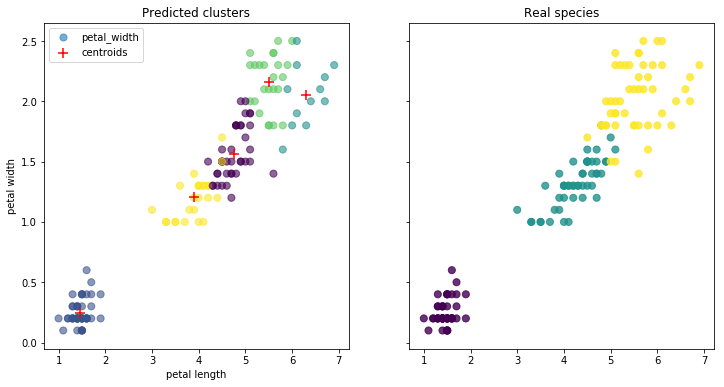

In [7]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5).fit(X)

centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns=X.columns)

clusters = model.labels_

fig, ax = plt.subplots(1,2,sharey=True,figsize=(12,6) )

ax[0].scatter(X['petal_length'], X['petal_width'], c= clusters, s=50, alpha=0.6)
ax[0].scatter(centroids.loc[:, 'petal_length'], centroids.loc[:, 'petal_width'], c='red', s=100, marker="+", label="centroids")
ax[0].set_xlabel("petal length")
ax[0].set_ylabel("petal width")
ax[0].legend()
ax[0].set_title("Predicted clusters")


ax[1].scatter(X['petal_length'], X['petal_width'], c= y.map( {"setosa":0, "versicolor":1, "virginica":2}), s=50, alpha=0.8)
ax[1].set_title("Real species")

plt.show()

In [8]:
from sklearn.metrics import mutual_info_score, homogeneity_score, silhouette_score
from sklearn.metrics.cluster import contingency_matrix

print("Agreement with true labels = {:.1%}".format(mutual_info_score(clusters, y)))
print("Homogeneity with true labels = {:.1%}".format(homogeneity_score(clusters, y))) # [0,1] each cluster contains only members of a single class
print("Silhouette coefficient = {:.2}".format(silhouette_score(X, clusters, metric='euclidean'))) # [-1, 1] the higher, the more compact distinct clusters
display(contingency_matrix(clusters,y))

Agreement with true labels = 90.5%
Homogeneity with true labels = 59.9%
Silhouette coefficient = 0.49


array([[ 0, 26, 13],
       [50,  0,  0],
       [ 0,  0, 12],
       [ 0,  0, 24],
       [ 0, 24,  1]])

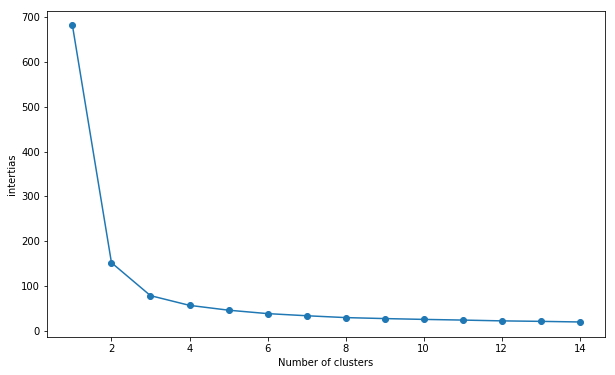

In [9]:
intertias = []

for i in range(1, 15):
    
    km = KMeans(
        n_clusters=i,
        random_state=0
    )
    km.fit(X)
    intertias.append(km.inertia_)

# plot
plt.figure(figsize=(10,6))
plt.plot(range(1, 15), intertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('intertias')
plt.show()

# Exercise

For this exercise you will use another dataset called HTRU2.

You can find it here: https://archive.ics.uci.edu/ml/datasets/HTRU2

This dataset contains data about pulsar candidates.

    Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter (see [2] for more uses).

    As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

    Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation. Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. The class labels used are 0 (negative) and 1 (positive).

NB: don't change the existing code in the cells below, only add code to make it work properly

## Preparing data

Import the HTRU_2.csv dataset and have a look at it using head

In [10]:
df = pd.read_csv("HTRU_2.csv")
df.head()

,mean_ip,std_ip,kurt_ip,skew_ip,mean_dm,std_dm,kurt_dm,skew_dm,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Check if there are missing values in the dataset (you can use isna and sum methods)

In [11]:
df.isna().sum()

mean_ip    0
std_ip     0
kurt_ip    0
skew_ip    0
mean_dm    0
std_dm     0
kurt_dm    0
skew_dm    0
target     0
dtype: int64

extract the target values in one variable and keep all the other columns in another variable

In [12]:
y = df["target"].copy()
X = df.drop("target", axis=1)
cols = X.columns

## Modeling

* Create a KMeans model
* Fit it to your dataset
* select 2 columns for the plots
* create a scatter plot to show your columns on the 2 axes colored by the cluster they belong to
* then on the same plot, add the centroids points
* finally create a second plot with the real data colored by their target values
* then try with different columns to find the best clusters

In [13]:
y.value_counts()

0    16259
1     1639
Name: target, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X.columns = cols

In [15]:
X.head()

,mean_ip,std_ip,kurt_ip,skew_ip,mean_dm,std_dm,kurt_dm,skew_dm
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794


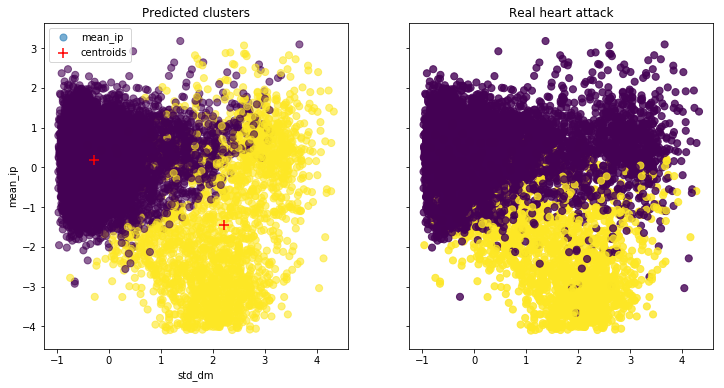

In [16]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2).fit(X)

centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns=X.columns)

clusters = model.labels_

column1 = "std_dm"
column2 = "mean_ip"

fig, ax = plt.subplots(1,2,sharey=True,figsize=(12,6) )


ax[0].scatter(X[column1], X[column2], c= clusters, s=50, alpha=0.6)
ax[0].scatter(centroids.loc[:, column1], centroids.loc[:, column2], c='red', s=100, marker="+", label="centroids")
ax[0].set_xlabel(column1)
ax[0].set_ylabel(column2)
ax[0].legend()
ax[0].set_title("Predicted clusters")

ax[1].scatter(X[column1], X[column2], c= y, s=50, alpha=0.8)
ax[1].set_title("Real heart attack")

plt.show()

In [17]:
from sklearn.metrics import mutual_info_score, homogeneity_score, silhouette_score
from sklearn.metrics.cluster import contingency_matrix

print("Agreement with true labels = {:.1%}".format(mutual_info_score(clusters, y)))
print("Homogeneity with true labels = {:.1%}".format(homogeneity_score(clusters, y))) # [0,1] each cluster contains only members of a single class
print("Silhouette coefficient = {:.2}".format(silhouette_score(X, clusters, metric='euclidean'))) # [-1, 1] the higher, the more compact distinct clusters
display(contingency_matrix(clusters,y))

Agreement with true labels = 13.4%
Homogeneity with true labels = 37.7%
Silhouette coefficient = 0.6


array([[15483,   358],
       [  776,  1281]])